In [3]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import svm
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport

In [5]:
import sklearn

sklearn.__version__

'1.1.2'

### Erster Blick in die Daten

In [6]:
URL = "https://datahub.io/machine-learning/adult/r/adult.csv"
#raw_data = os.path.join( "data", "data.csv")
raw_data = os.path.join("adult_csv.csv")
df_raw = pd.read_csv(raw_data, sep = ",")


In [7]:
df_raw.shape

(48842, 15)

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df_raw.isna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [9]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,1.771078,1.295378,0.0,1.0,2.0,3.0,4.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capitalgain,48842.0,0.200319,0.746182,0.0,0.0,0.0,0.0,4.0
capitalloss,48842.0,0.114942,0.556924,0.0,0.0,0.0,0.0,4.0
hoursperweek,48842.0,1.950698,0.897038,0.0,2.0,2.0,2.0,4.0


In [20]:
print(df_raw.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'class'],
      dtype='object')


In [35]:
for col in df_raw:
    print(df_raw[col].unique())


[2 3 1 0 4]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ... 173449  89686 350977]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
[1 0 4 2 3]
[0 3 1 2 4]
[2 0 3 4 1]
['United-States' 'Cuba' 'Jamaica' 'India' nan

In [16]:
df_raw["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [38]:
df_raw.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

<AxesSubplot: >

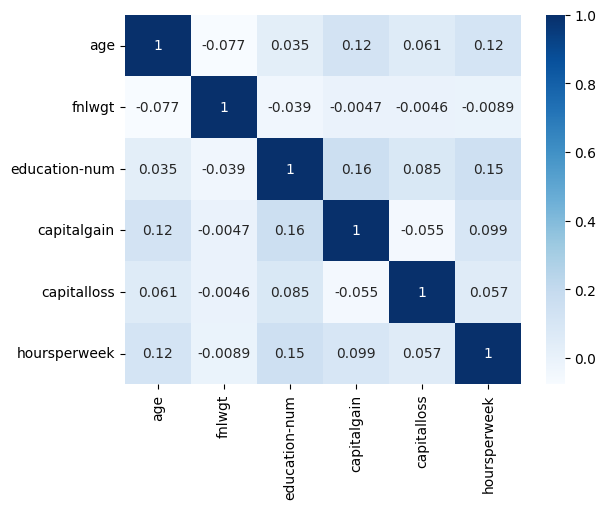

In [50]:
import seaborn as sns
%matplotlib inline
corr = df_raw.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### Summary aus dem Datensatz

1. Age bereits geclustert in 5 Kategorien


### Pandas Profiling Report
auskommentiert wegen GitHub

In [122]:
#html profile report erstellen um eine detaillierte Übersicht über die Zusammenhänge innerhalb des Datensatzes zu generieren
#profile = ProfileReport(df_raw, title="Countries Profiling Report", explorative=True)
#profile.to_notebook_iframe()

c:\Users\Lennart Reschke\anaconda3\envs\ads3-06-dash\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='education-num', ylabel='Count'>

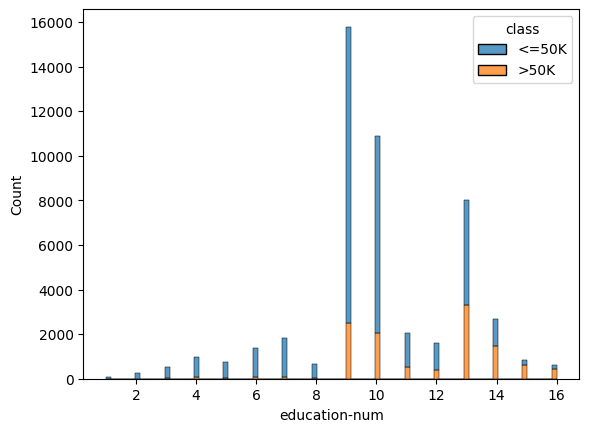

In [76]:
sns.histplot(data=df_raw, x="education-num", hue="class", multiple="stack")

#Obwohl Korrelation zwischen education und education-num, Column wird nicht entfernt, da abnehmende "Skalenerträge" = Bei Grenze von 10 Jahren Education Anteil von >50k geht runter

### Subset für Testzwecke
Beschränkung des Datensatz auf 5000 Datenpunkte

In [53]:
df_small = df_raw.head(5000)

In [62]:
#The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.

del df_small['fnlwgt']

In [63]:
df_small.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [66]:
df_small["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [78]:
df_small["workclass"].value_counts()

Private             3435
Self-emp-not-inc     383
Local-gov            329
State-gov            193
Self-emp-inc         182
Federal-gov          146
Without-pay            1
Name: workclass, dtype: int64

### Scaling
Welche Kateogiren müssen gescalet werden? Keine! Da es keine großen spreads gibt innerhalb der Kategorien

### Zusammenlegung von Workclass rare categories

In [81]:
df_raw["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [89]:
workclass_count = df_raw["workclass"].value_counts()
Nan_workclass = workclass_count[workclass_count < 100].index.to_list()

In [90]:
df_raw["workclass"] = df_raw["workclass"].astype("object")
df_raw.loc[df_raw.query(f"workclass == @Nan_workclass").index, "workclass"] = "Nan"

In [ ]:
marital_status_count = df_raw["marital-status"].value_counts()
rare_marital_status = marital_status_count[marital_status_count < 1000].index.to_list()

df_raw["marital-status"] = df_raw["marital-status"].astype("object")
df_raw.loc[df_raw.query(f"marital-status == @rare_marital_status").index, "marital-status"] = "Married-civ-spouse"

In [91]:
df_raw["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Nan                    31
Name: workclass, dtype: int64

In [96]:
del df_raw["fnlwgt"]

In [97]:
df_raw.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [108]:
df_raw["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [118]:
df_raw.rename(columns={"marital-status":"marital_status"}, inplace=True)


In [119]:
df_raw.head()

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [114]:
df_raw["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [103]:
marital_status_count = df_raw["marital-status"].value_counts()
rare_marital_status = marital_status_count[marital_status_count < 1000].index.to_list()

In [113]:
rare_marital_status

['Married-spouse-absent', 'Married-AF-spouse']

In [120]:
df_raw["marital_status"] = df_raw["marital_status"].astype("object")
df_raw.loc[df_raw.query(f"marital_status == @rare_marital_status").index, "marital_status"] = "Married-civ-spouse"

In [121]:
df_raw["marital_status"].value_counts()

Married-civ-spouse    23044
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: marital_status, dtype: int64

## Zusammenlegung von Self-emps und Gov als Untersuchungsmöglichkeit 